# Example of usage of Sorbetto for the TSW project 7 

In [1]:
import os
import json
import matplotlib.pyplot as plt

## Load data

In [2]:
PATH_DATA = os.path.join(os.getcwd(), "data", "TSW_project7_data.json")

f = open(PATH_DATA)
confusion_matrices_project7 = json.load(f)
f.close()

print(confusion_matrices_project7)

{'2mod_2d_3d': [[50, 0, 53], [0, 9, 76], [6, 0, 113]], '2mod_2d_tab': [[70, 1, 32], [4, 15, 66], [13, 5, 101]], '2mod_2d_text': [[73, 5, 25], [4, 49, 32], [15, 23, 81]], '2mod_3d_tab': [[80, 0, 23], [5, 3, 77], [60, 0, 59]], '2mod_3d_text': [[58, 3, 42], [0, 82, 3], [20, 21, 78]], '2mod_tab_text': [[79, 0, 24], [0, 82, 3], [40, 14, 65]], '3mod_2d_3d_tab': [[85, 3, 15], [10, 28, 47], [26, 10, 83]], '3mod_2d_3d_text': [[73, 0, 30], [2, 80, 3], [16, 11, 92]], '3mod_2d_tab_text': [[81, 1, 21], [22, 9, 54], [34, 0, 85]], '3mod_3d_tab_text': [[38, 0, 65], [0, 82, 3], [7, 14, 98]], 'all_3out': [[84, 0, 19], [3, 76, 6], [22, 11, 86]], 'bert_unfrozen': [[38, 0, 65], [0, 82, 3], [3, 14, 102]], 'densenet3d_unfrozen': [[84, 0, 19], [15, 6, 64], [50, 3, 66]], 'resnet_unfrozen': [[74, 5, 24], [5, 50, 30], [10, 18, 91]], 'resenet3D_unfrozen': [[15, 36, 52], [0, 85, 0], [2, 73, 44]], 'tab_unfrozen': [[67, 3, 33], [0, 82, 3], [67, 25, 27]]}


In [3]:
from sorbetto.performance.two_class_classification_performance import (
    TwoClassClassificationPerformance,
)
from sorbetto.core.entity import Entity

## Create performance and entity objects

In [4]:
performances_list = []
entities_list = []
colors = [
    "lightcoral",
    "darkred",
    "peru",
    "orange",
    "yellow",
    "yellowgreen",
    "turquoise",
    "teal",
    "dodgerblue",
    "slategray",
    "navy",
    "blueviolet",
    "hotpink",
    "crimson",
    "tomato",
    "seashell",
]
i = 0
data_json = []
for entity_name, cf in confusion_matrices_project7.items():
    proba_tn = cf[1][1]
    proba_fp = cf[1][0] + cf[1][2]
    proba_fn = cf[0][1] + cf[2][1]
    proba_tp = cf[2][0] + cf[2][2]
    total = proba_tn + proba_tp + proba_fp + proba_fn
    proba_tn = proba_tn / total
    proba_fp = proba_fp / total
    proba_fn = proba_fn / total
    proba_tp = proba_tp / total
    performance = TwoClassClassificationPerformance(
        ptn=proba_tn,
        pfp=proba_fp,
        pfn=proba_fn,
        ptp=proba_tp,
        name=entity_name,
    )
    performances_list.append(performance)
    entities_list.append(Entity(performance, name=entity_name, color=colors[i]))
    i += 1
    data_json.append(
        {
            "filename": entity_name,
            "proba_fn": proba_fn,
            "proba_fp": proba_fp,
            "proba_tn": proba_tn,
            "proba_tp": proba_tp,
        }
    )

In [5]:
with open("data/TSW_project7_data_two_classes.json", "w", encoding="utf-8") as fichier:
    json.dump(data_json, fichier, indent=4)

## Get Value Tile 

In [6]:
from sorbetto.parameterization.parameterization_default import ParameterizationDefault
from sorbetto.tile.value_tile import ValueTile
from sorbetto.flavor.value_flavor import ValueFlavor
from sorbetto.annotation.annotation_text import AnnotationText
from sorbetto.annotation.annotation_isovalue_curves import AnnotationIsovalueCurves
from sorbetto.annotation.annotation_curve_fixed_class_priors import (
    AnnotationCurveFixedClassPriors,
)
from sorbetto.ranking.ranking_score import RankingScore

In [7]:
# Create the flavor and tile objects
flavors_list = []
value_tiles_list = []
for performance in performances_list:
    flavor = ValueFlavor(performance=performance)
    flavors_list.append(flavor)
    value_tiles_list.append(
        ValueTile(
            name=f"Value Tile for {performance.name}",
            parameterization=ParameterizationDefault(),
            flavor=flavor,
        )
    )

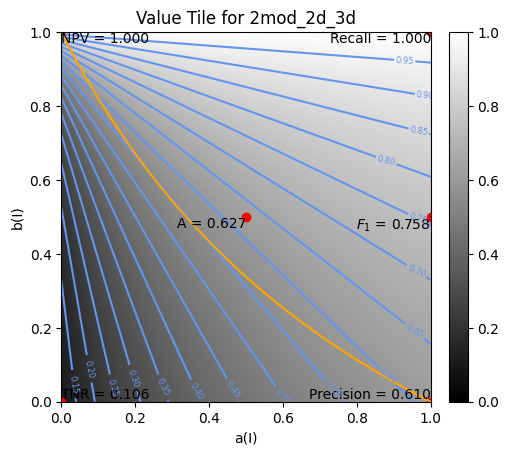

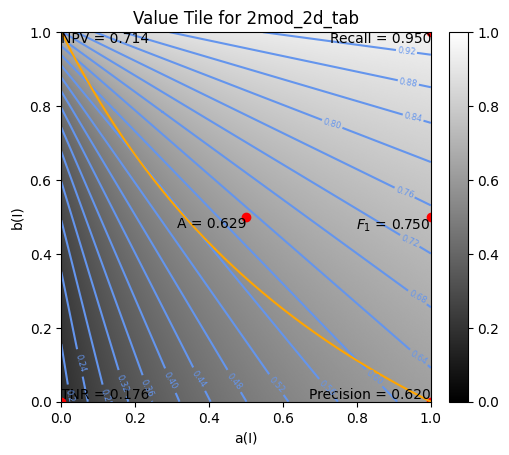

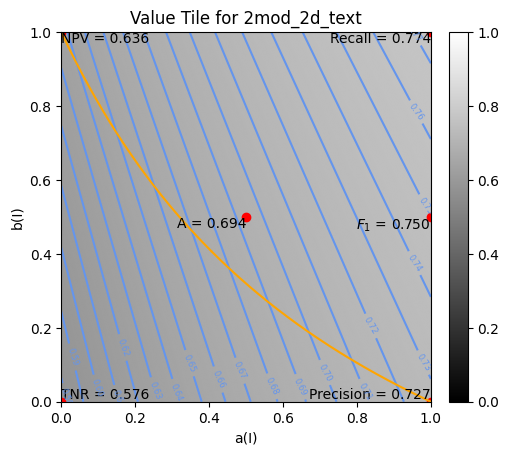

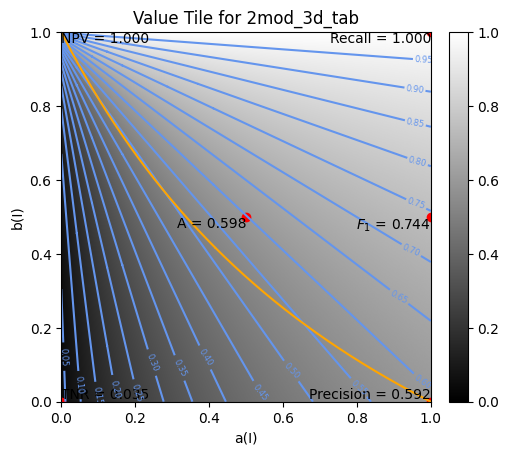

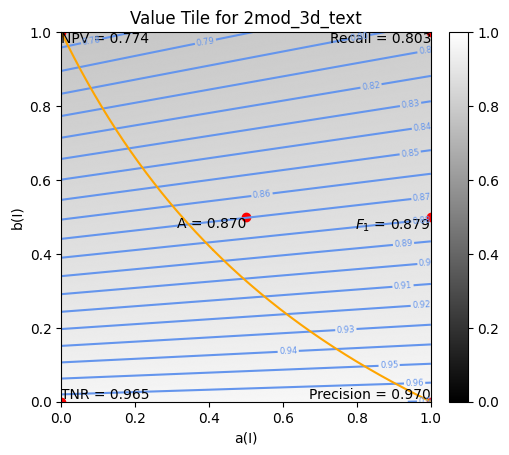

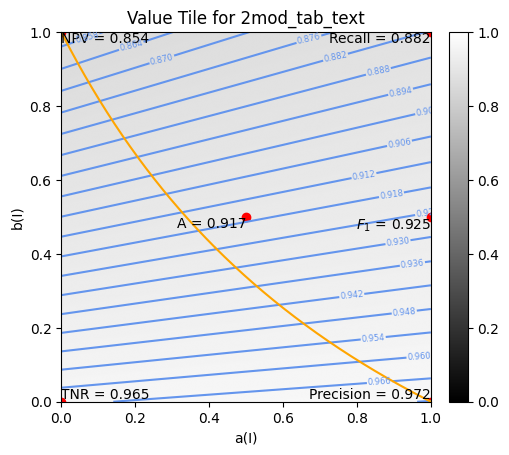

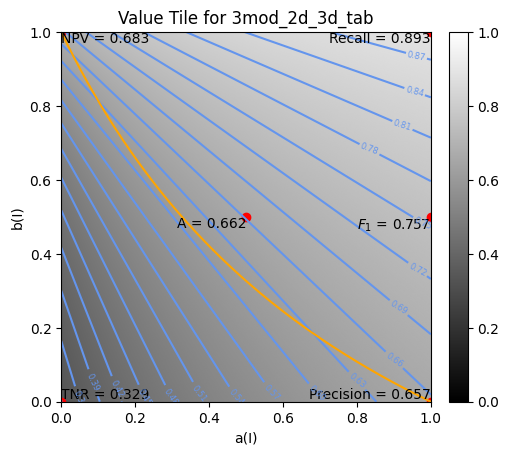

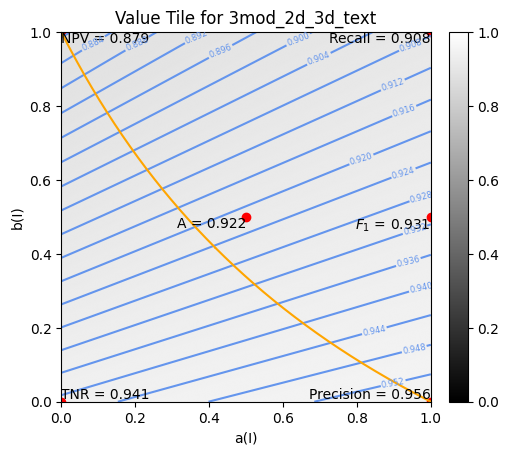

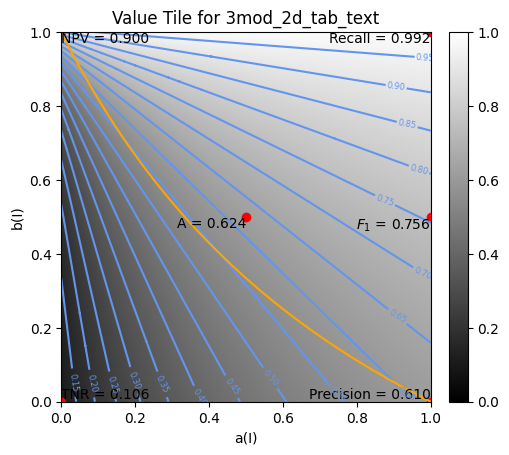

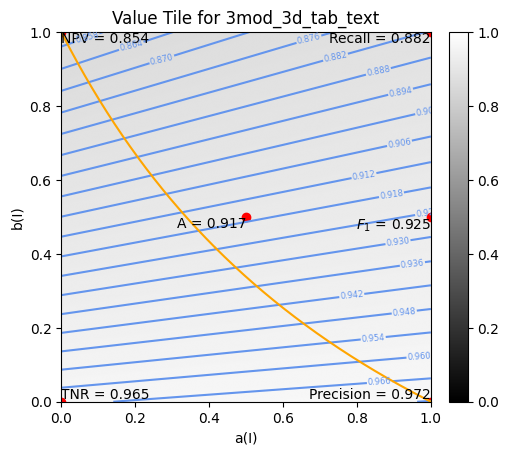

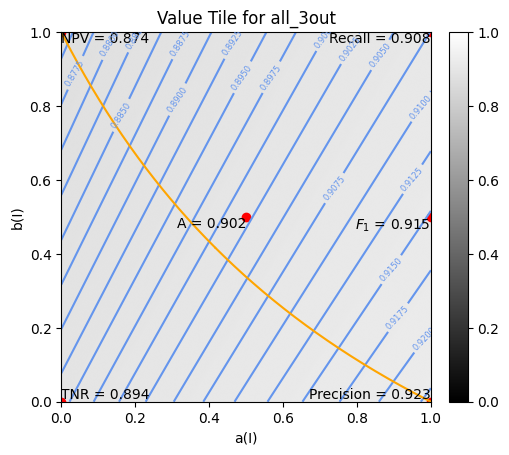

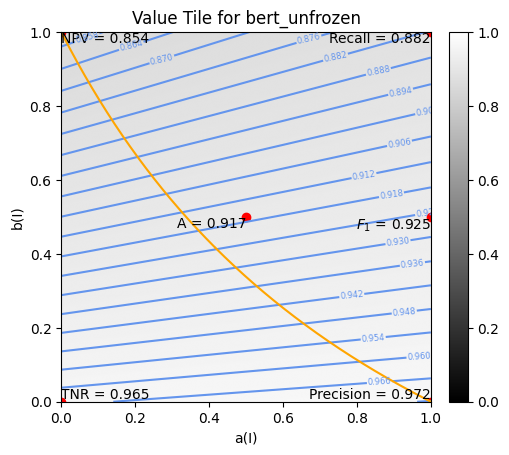

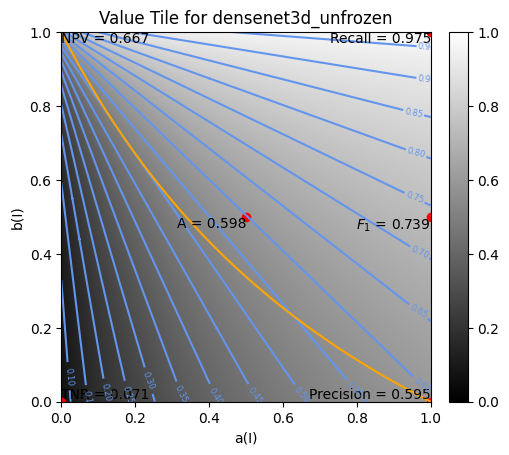

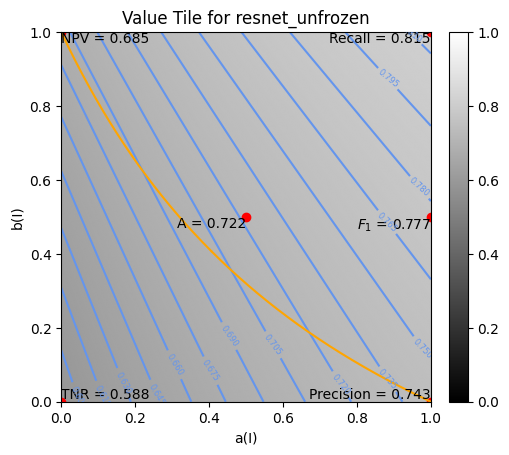

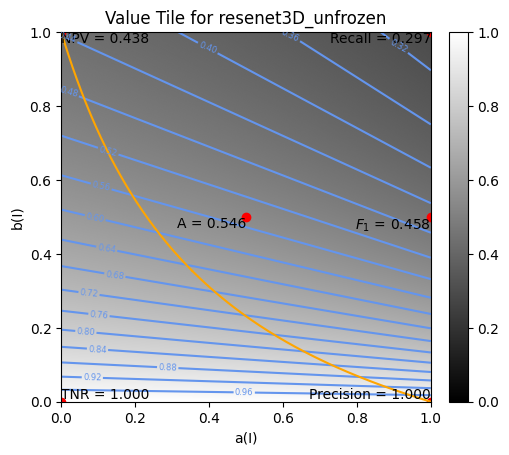

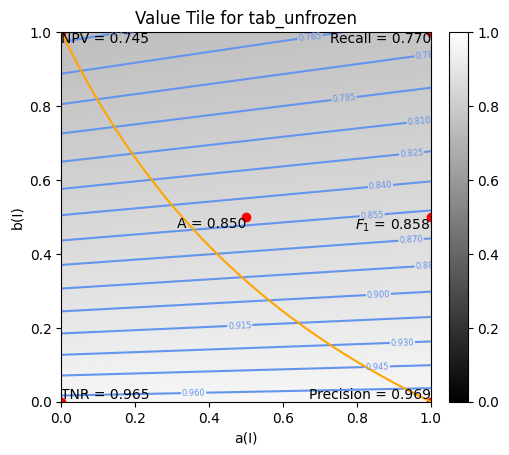

In [8]:
for value_tile in value_tiles_list:
    value_tile.clearAnnotations()

    # Add annotations
    accuracy_score = RankingScore.getAccuracy()
    accuracy_value = accuracy_score(value_tile.performance)
    accuracy_point_annotation = AnnotationText(
        location=accuracy_score, label=f"A = {accuracy_value:.3f}", color="red"
    )
    value_tile.appendAnnotation(accuracy_point_annotation)

    F1_score = RankingScore.getF(1.0)
    F1_value = F1_score(value_tile.performance)
    F1_point_annotation = AnnotationText(
        location=F1_score,
        label=f"$F_1$ = {F1_value:.3f}",
        color="red",
    )
    value_tile.appendAnnotation(F1_point_annotation)

    precision_score = RankingScore.getPrecision()
    precision_value = precision_score(value_tile.performance)
    precision_point_annotation = AnnotationText(
        location=precision_score,
        label=f"Precision = {precision_value:.3f}",
        color="red",
    )
    value_tile.appendAnnotation(precision_point_annotation)

    recall_score = RankingScore.getRecall()
    recall_value = recall_score(value_tile.performance)
    recall_point_annotation = AnnotationText(
        location=recall_score, label=f"Recall = {recall_value:.3f}", color="red"
    )
    value_tile.appendAnnotation(recall_point_annotation)

    NPV_score = RankingScore.getNegativePredictiveValue()
    NPV_value = NPV_score(value_tile.performance)
    NPV_point_annotation = AnnotationText(
        location=NPV_score, label=f"NPV = {NPV_value:.3f}", color="red"
    )
    value_tile.appendAnnotation(NPV_point_annotation)

    TNR_score = RankingScore.getTrueNegativeRate()
    TNR_value = TNR_score(value_tile.performance)
    TNR_point_annotation = AnnotationText(
        location=TNR_score, label=f"TNR = {TNR_value:.3f}", color="red"
    )
    value_tile.appendAnnotation(TNR_point_annotation)

    isolines_annotation = AnnotationIsovalueCurves()
    value_tile.appendAnnotation(isolines_annotation)

    performance = value_tile.performance
    proba_tn = performance.ptn
    proba_fp = performance.pfp
    proba_fn = performance.pfn
    proba_tp = performance.ptp
    prior_pos = proba_tp + proba_fn
    prior_annotation = AnnotationCurveFixedClassPriors(priorPos=prior_pos, c="orange")
    value_tile.appendAnnotation(prior_annotation)

    # Draw the Value Tile
    fig, ax = value_tile.draw()
    # ax.images[-1].set_clim(0.8, 1)
    plt.show()

    # Save figure
    fig.savefig(f"fig/project7_valueTile_{value_tile.performance.name}.pdf")

## Get Entity Tile "who's first?" 

In [9]:
from sorbetto.tile.entity_tile import EntityTile
from sorbetto.flavor.entity_flavor import EntityFlavor

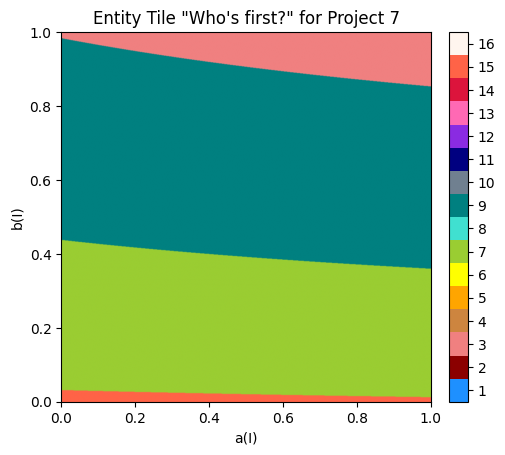

In [10]:
# Create the entity flavor and entity tile
project7_entity_flavor = EntityFlavor(rank=1, entity_list=entities_list)
project7_entity_tile = EntityTile(
    name='Entity Tile "Who\'s first?" for Project 7',
    parameterization=ParameterizationDefault(),
    flavor=project7_entity_flavor,
    resolution=1001,
)

# Draw the entity tile
fig, ax = project7_entity_tile.draw()
plt.show()

# Save figure
fig.savefig("fig/project7_entityTile_rank1.pdf")

## Get Ranking Tile

In [11]:
from sorbetto.tile.ranking_tile import RankingTile
from sorbetto.flavor.ranking_flavor import RankingFlavor

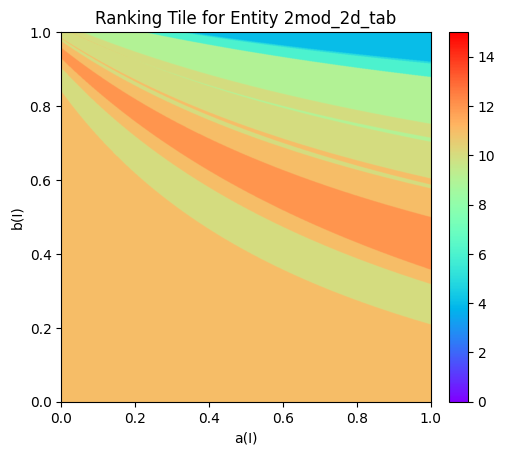

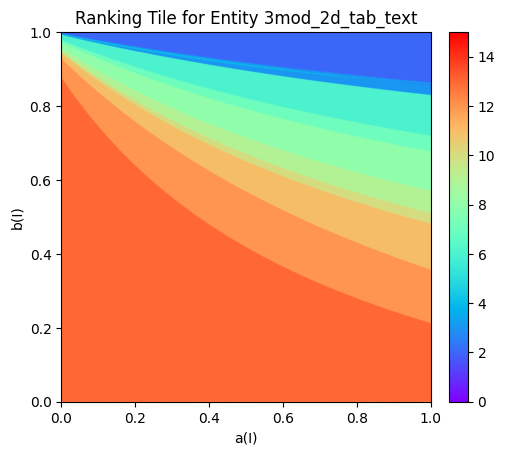

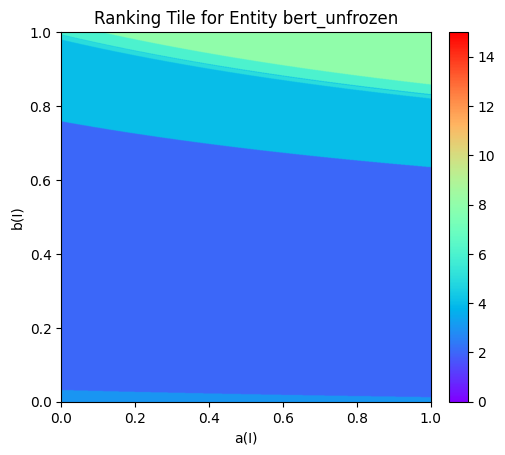

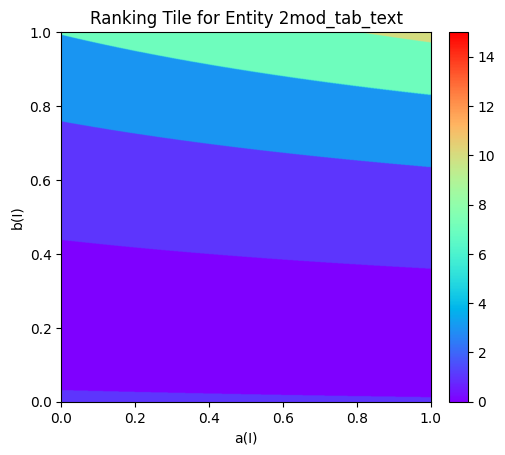

In [12]:
# Create the ranking flavor and ranking tile
entities_id = [1, 8, 11, 5]

for id in entities_id:
    project7_ranking_flavor = RankingFlavor(
        entity=entities_list[id],
        entity_list=entities_list,
    )
    project7_ranking_tile = RankingTile(
        name=f"Ranking Tile for Entity {performances_list[id].name}",
        parameterization=ParameterizationDefault(),
        flavor=project7_ranking_flavor,
    )

    # Draw the ranking tile
    fig, ax = project7_ranking_tile.draw()
    plt.show()

    # Save figure
    fig.savefig(f"fig/project7_rankingTile_{performances_list[id].name}.pdf")